In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#Numerical libraries and files reader
import re

#Natural language Toolkit
import nltk  
from nltk import wordpunct_tokenize, WordNetLemmatizer, sent_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
toktok = ToktokTokenizer()
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')


import string
import emoji

#Machine learning libraries
import sklearn

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

from sklearn import tree

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#!pip install emoji
#Graphing library
#!pip install langdetect
#!pip install graphviz
#!pip install dtreeviz

#!pip install -q dtreeviz

In [2]:
#from dtreeviz.trees import dtreeviz
from dtreeviz import dtreeviz

## Preprocesamiento

In [3]:
#def remove_emoji(text):
#    return " ".join([emoji.replace_emoji(text, replace = ' ' ) for i in text])
    
def remove_stop_words(text, language= 'english'):
  stop = set(stopwords.words(language));
  return  " ".join([i for i in text.split(" ") if not i in stop])

def remove_punctuation_mark(text, replace = " "):
  return re.sub('[%s]' % re.escape(string.punctuation +"¡¿"), replace, text);

def replace_digits(text, replace = "d"):
  return re.sub('[%s]' % re.escape("0123456789"), replace, text);

def tokens(text):
  return toktok.tokenize(text);   

def remove_word_frec_lower(text, rep, minrep = 1):
  return  " ".join([i for i in text.split(" ") if rep[i] >= minrep])

def get_bigramas(text):

  palabras = text
  new_text = "";  
  for i in range(len(palabras)-1):
    if i > 0:
     new_text += " ";  
    new_text += palabras[i] + "_" + palabras[i+1];
  return new_text;

def preprocess(df, minrep = 1, bigramas = 0):
  
  new_df = list();
  list_df = list()
  voc = list();
  rep = dict();
  h = 1;
  for text in df:
    
    #text = remove_emoji(text);
    
    text = text.lower();
    
    text = remove_stop_words(text, language='spanish');
   
    text = remove_punctuation_mark(text);
    
    text = replace_digits(text);

    text = tokens(text);
   
    text = [stemmer.stem(t) for t in text];
    if bigramas == 0:
      text =" ".join(text);
    elif bigramas == 1:
      text = get_bigramas(text);
    elif bigramas == 2:
      text =" ".join(text)+" " + get_bigramas(text);
    list_df.append(text);
    for t in text.split(" "):
      if not t in rep:
        rep[t] = 0;
      rep[t] += 1;
      
    #print(str(h) + "/" +str(len(df)));
    h+=1;
  
  for text in list_df:
    text = remove_word_frec_lower(text, rep, minrep= minrep);  
    new_df.append(text);
    voc += text.split(" ");

  voc = list(set(voc));
  voc.sort();

  return new_df, voc;

In [6]:
datos = pd.read_excel("opinions.xlsx")
datos.head()

,Title,Opinion,Polarity,Attraction
0,Pésimo lugar,"Piensen dos veces antes de ir a este hotel, te...",1,Hotel
1,No vayas a lugar de Eddie,Cuatro de nosotros fuimos recientemente a Eddi...,1,Restaurant
2,Mala relación calidad-precio,seguiré corta y simple: limpieza\n- bad. Tengo...,1,Hotel
3,Minusválido? ¡No te alojes aquí!,Al reservar un hotel con multipropiedad Mayan ...,1,Hotel
4,Es una porqueria no pierdan su tiempo,"No pierdan su tiempo ni dinero, venimos porque...",1,Hotel


In [7]:
datos_ = datos.dropna()

In [8]:
datos_.isnull().sum()

Title         0
Opinion       0
Polarity      0
Attraction    0
dtype: int64

In [9]:
textos = datos_.Opinion
polaridad = datos_.Polarity
atractivo = datos_.Attraction

In [10]:
new_df_op, voc_op = preprocess(list(textos.values), minrep = 10, bigramas=0)

In [11]:
len(voc_op)

5792

## Bag of Words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
new_df = new_df_op.copy()
voc = voc_op.copy()

In [14]:
vectorizer = CountVectorizer()
X_op = vectorizer.fit_transform(new_df_op)
vectorizer.get_feature_names_out()
print(X_op.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
X_op.shape

(30209, 5744)

## Word Cloud

In [ ]:
#!pip install wordcloud

In [16]:
from wordcloud import WordCloud

In [17]:
df_op = pd.DataFrame(new_df_op)
df_op.head()

,0
0,piens dos vec ir hotel molest tod hij seis año...
1,cuatr recient eddi s plac servici terribl pes ...
2,segu cort simpl limpiez insist limpi suel camb...
3,reserv hotel multipropied may grup dij necesit...
4,pierd tiemp diner ven bod aqu mism complej tan...


In [18]:
text_hotel = " ".join(review for review in df_op.iloc[atractivo.values == 'Hotel',0].values)
text_rest = " ".join(review for review in df_op.iloc[atractivo.values == 'Restaurant',0].values)
text_atract = " ".join(review for review in df_op.iloc[atractivo.values == 'Attractive',0].values)

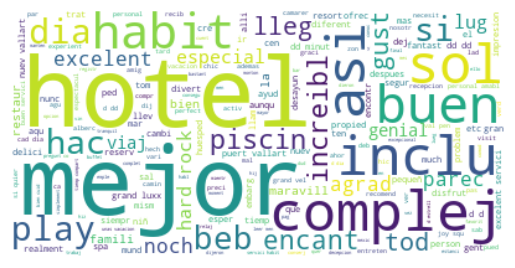

In [21]:
wordcloud = WordCloud(background_color ='white').generate(text_hotel)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

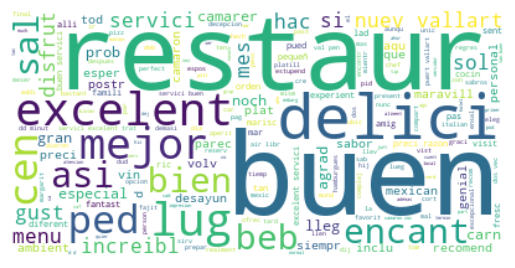

In [22]:
wordcloud = WordCloud(background_color ='white').generate(text_rest)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

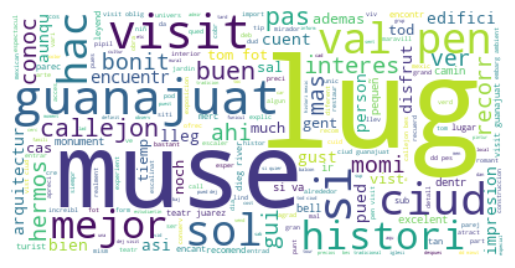

In [23]:
wordcloud = WordCloud(background_color = 'white').generate(text_atract)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
text_mm = " ".join(review for review in df_op.iloc[polaridad.values == 1,0].values)
text_mal = " ".join(review for review in df_op.iloc[polaridad.values == 2,0].values)
text_neu = " ".join(review for review in df_op.iloc[polaridad.values == 3,0].values)
text_bue = " ".join(review for review in df_op.iloc[polaridad.values == 4,0].values)
text_mb = " ".join(review for review in df_op.iloc[polaridad.values == 5,0].values)

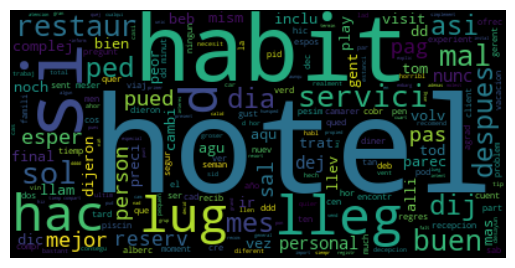

In [25]:
wordcloud = WordCloud().generate(text_mm)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

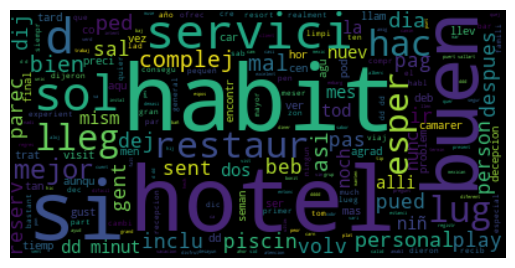

In [26]:
wordcloud = WordCloud().generate(text_mal)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

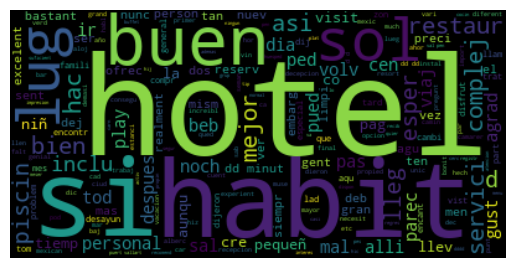

In [27]:
wordcloud = WordCloud().generate(text_neu)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

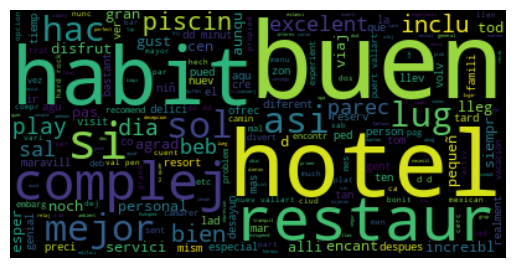

In [28]:
wordcloud = WordCloud().generate(text_bue)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

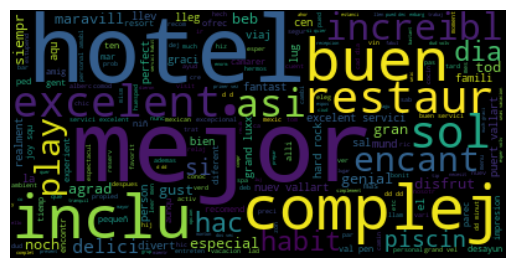

In [29]:
wordcloud = WordCloud().generate(text_mb)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Clustering

### $k$-means

In [30]:
X_c = X_op.copy()

In [33]:
k=5
kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
etiqueta_k = kmeans.fit_predict(X_c)

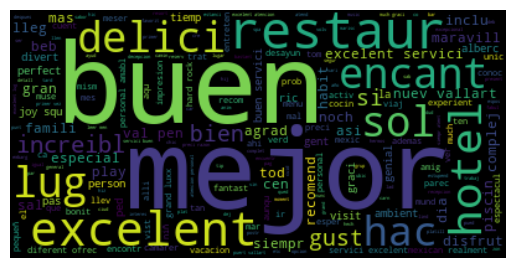

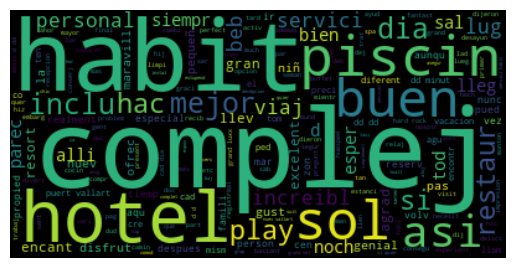

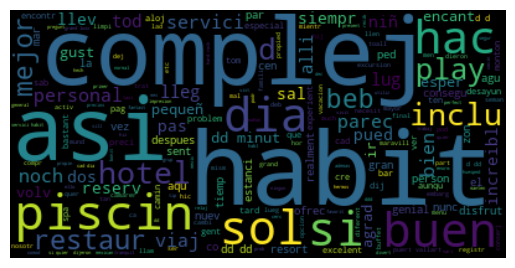

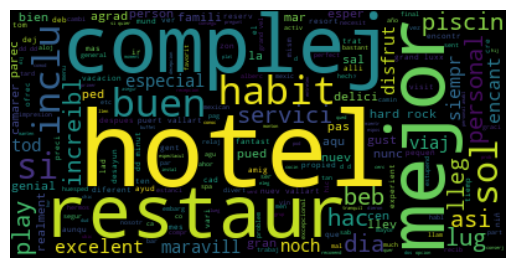

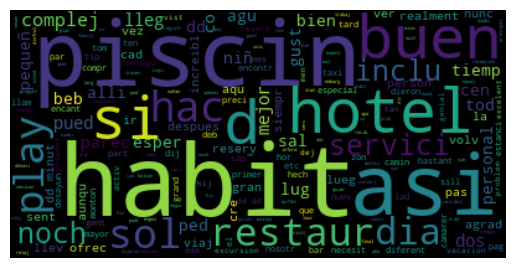

In [34]:
for i in range(k):
    text_= " ".join(review for review in df_op.iloc[etiqueta_k == i,0].values)
    wordcloud = WordCloud().generate(text_)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    

### Kernel $k$-means

In [35]:
from kernel_kmeans import *

In [36]:
X_kkm = X_c.copy()

In [ ]:
k=3
kernel_km = KernelKMeans(n_clusters=k,kernel='rbf')
etiqueta_kkm = kernel_km.fit_predict(X_kkm)

## Representación TF-IDF

In [37]:
def bowTfIdf(df):
  vectorizer = TfidfVectorizer()
  X = vectorizer.fit_transform(df).toarray()
  return np.array(X), vectorizer

In [38]:
X, modeloTFiDF = bowTfIdf(new_df_op);

vectorizer_test = TfidfVectorizer(vocabulary=modeloTFiDF.vocabulary_)

In [39]:
kmeans = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
etiqueta_k = kmeans.fit_predict(X)

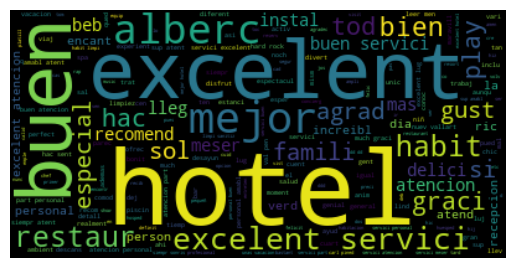

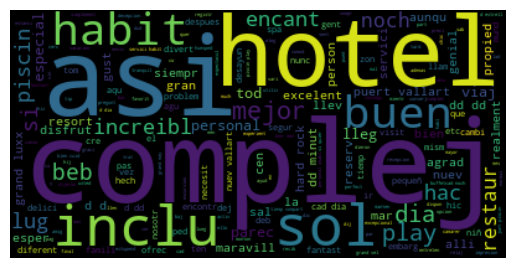

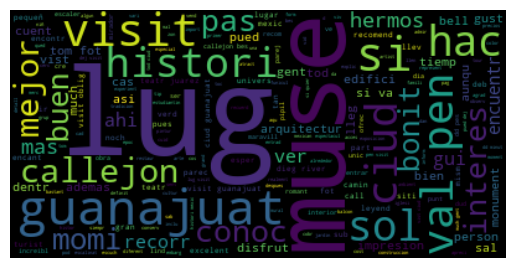

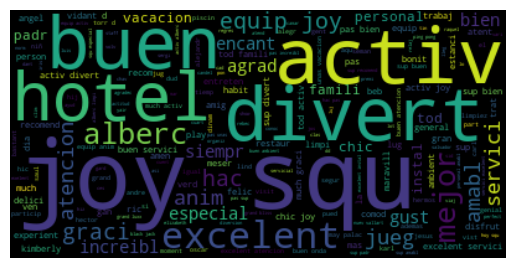

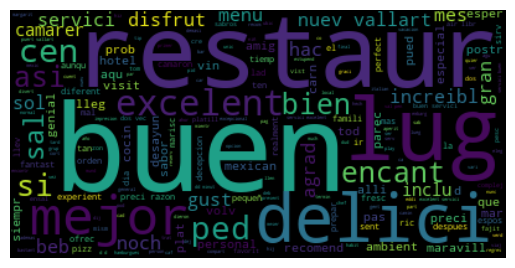

In [40]:
for i in range(5):
    text_= " ".join(review for review in df_op.iloc[etiqueta_k == i,0].values)
    wordcloud = WordCloud().generate(text_)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()